# This is a simple example of how to load and plot the provided data.

In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data (update the path to the correct location)
data_path = "../processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

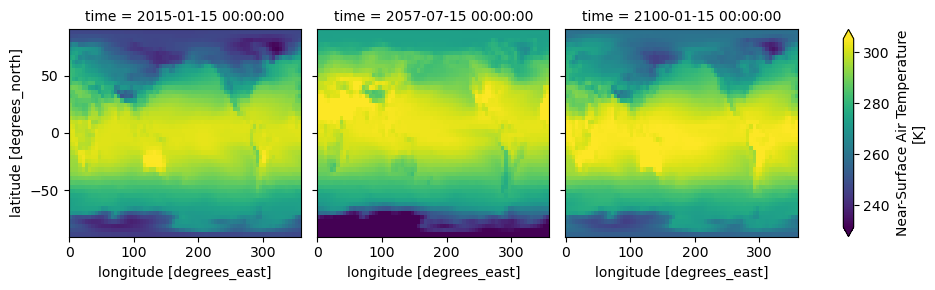

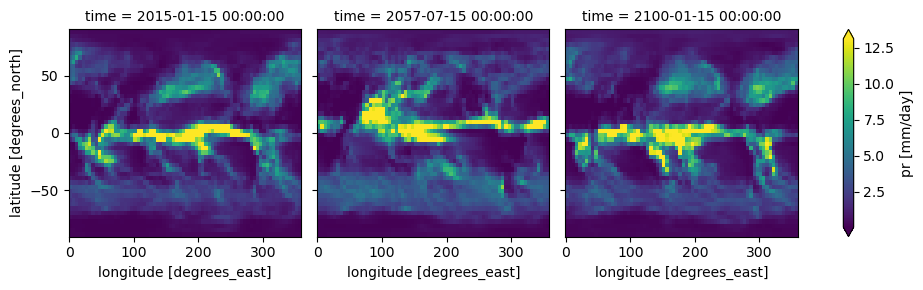

In [3]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

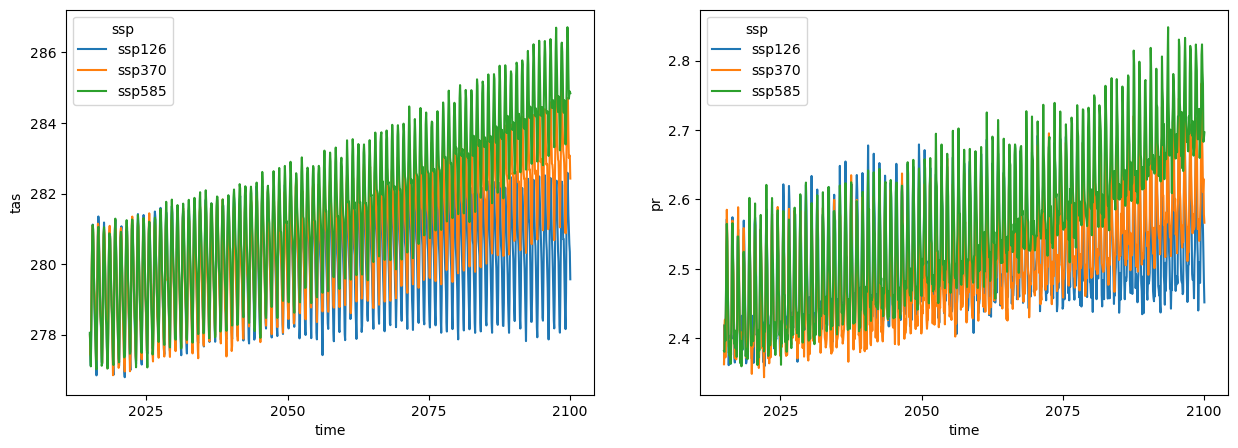

In [4]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

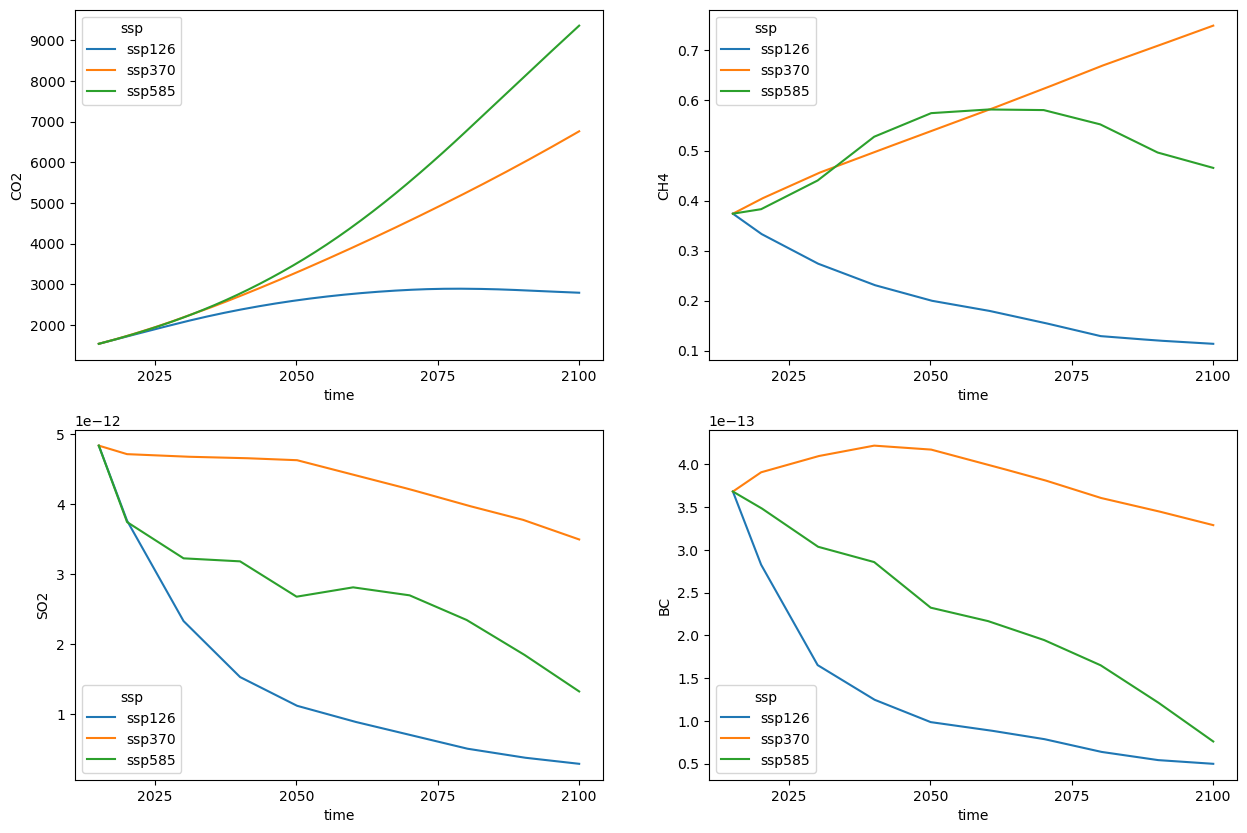

In [5]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")

# Distribution of Target Variables

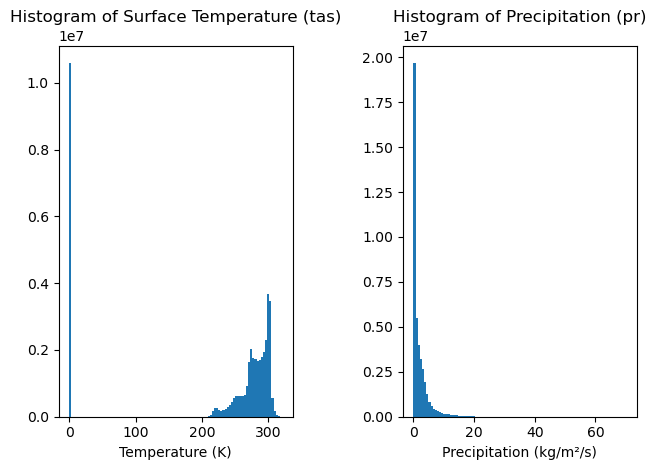

In [6]:
fig, axes = plt.subplots(1, 2)

data.tas.plot.hist(bins=100, ax=axes[0])
axes[0].set_title("Histogram of Surface Temperature (tas)")
axes[0].set_xlabel("Temperature (K)")

data.pr.plot.hist(bins=100, ax=axes[1])
axes[1].set_title("Histogram of Precipitation (pr)")
axes[1].set_xlabel("Precipitation (kg/m²/s)")


plt.tight_layout(w_pad=5)
plt.show()

In [7]:
tas_values = data.tas.values.flatten()
pr_values = data.pr.values.flatten()

print("Temperature (tas)")
print(f"Mean: {tas_values.mean()} K")
print(f"Std Dev: {tas_values.std()}")
print(f"Min: {tas_values.min()}, Max: {tas_values.max()}")
print("\n")
print("Precipitation (pr)")
print(f"Mean: {pr_values.mean()} mm/day")
print(f"Std Dev: {pr_values.std()}")
print(f"Min: {pr_values.min()}, Max: {pr_values.max()}")

Temperature (tas)
Mean: 210.59375 K
Std Dev: 122.93029022216797
Min: 0.0, Max: 320.86297607421875


Precipitation (pr)
Mean: 1.8944826126098633 mm/day
Std Dev: 2.800687789916992
Min: 0.0, Max: 70.12953186035156


# Distribution of Input Data

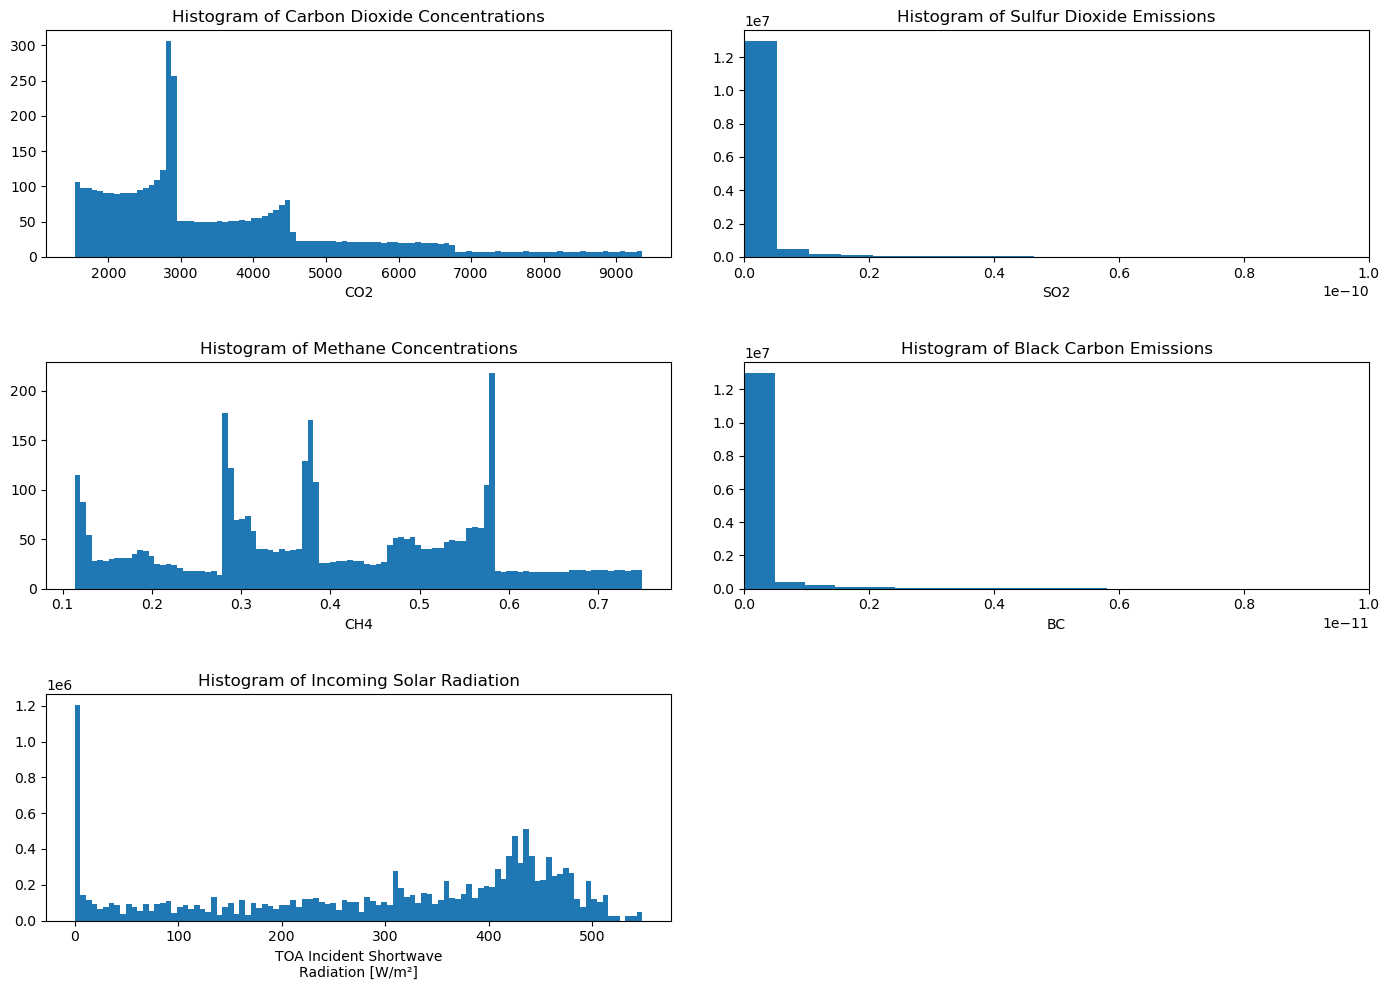

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10)) 

data.CO2.plot.hist(bins=100, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Carbon Dioxide Concentrations")

data.SO2.plot.hist(bins=100, ax=axes[0, 1])
axes[0, 1].set_title("Histogram of Sulfur Dioxide Emissions")
axes[0, 1].set_xlim(0, 1e-10)

data.CH4.plot.hist(bins=100, ax=axes[1, 0])
axes[1, 0].set_title("Histogram of Methane Concentrations")

data.BC.plot.hist(bins=100, ax=axes[1, 1])
axes[1, 1].set_title("Histogram of Black Carbon Emissions")
axes[1, 1].set_xlim(0, 1e-11)

data.rsdt.plot.hist(bins=100, ax=axes[2, 0])
axes[2, 0].set_title("Histogram of Incoming Solar Radiation")

fig.delaxes(axes[2, 1])
plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

In [9]:
CO2_values = data.CO2.values.flatten()
SO2_values = data.SO2.values.flatten()
CH4_values = data.CH4.values.flatten()
BC_values = data.BC.values.flatten()
rsdt_values = data.rsdt.values.flatten()

print("Carbon dioxide concentrations")
print(f"Mean: {CO2_values.mean()}")
print(f"Std Dev: {CO2_values.std()}")
print("\n")
print("Sulfur dioxide emissions")
print(f"Mean: {SO2_values.mean()}")
print(f"Std Dev: {SO2_values.std()}")
print("\n")
print("Methane concentrations")
print(f"Mean: {CH4_values.mean()}")
print(f"Std Dev: {CH4_values.std()}")
print("\n")
print("Black carbon emissions")
print(f"Mean: {BC_values.mean()}")
print(f"Std Dev: {BC_values.std()}")
print("\n")
print("Incoming solar radiation")
print(f"Mean: {rsdt_values.mean()}")
print(f"Std Dev: {rsdt_values.std()}")

Carbon dioxide concentrations
Mean: 3562.998212546647
Std Dev: 1683.4495533043969


Sulfur dioxide emissions
Mean: 2.7289931231803786e-12
Std Dev: 1.5275655098050523e-11


Methane concentrations
Mean: 0.4027893495002597
Std Dev: 0.16515540600671794


Black carbon emissions
Mean: 2.3013998163115786e-13
Std Dev: 1.2416409098582695e-12


Incoming solar radiation
Mean: 297.65399169921875
Std Dev: 164.0908966064453


In [10]:
data.ssp.values

array(['ssp126', 'ssp245', 'ssp370', 'ssp585'], dtype='<U6')

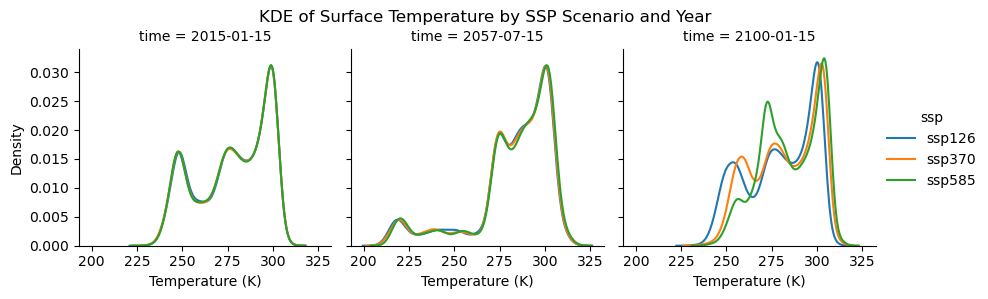

In [19]:
time_indices = [0, data.time.size // 2, -1]
df_list = []
for t in time_indices:
    for ssp in data.ssp.values:
        if ssp == "ssp245":
            continue
        tas_vals = data.sel(time=data.time[t], ssp=ssp).tas.values.flatten()
        df = pd.DataFrame({
            'tas': tas_vals,
            'ssp': ssp,
            'time': str(data.time[t].values)[:10]
        })
        df_list.append(df)

df_tas = pd.concat(df_list)
g = sns.FacetGrid(df_tas, col="time", hue="ssp", sharex=True, sharey=True)
g.map(sns.kdeplot, "tas", common_norm=False).add_legend()

g.set_axis_labels("Temperature (K)", "Density")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("KDE of Surface Temperature by SSP Scenario and Year")
plt.show()

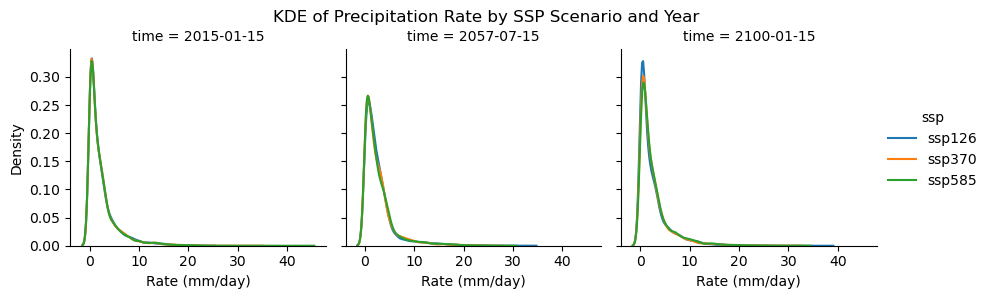

In [20]:
time_indices = [0, data.time.size // 2, -1]

df_list = []
for t in time_indices:
    for ssp in data.ssp.values:
        if ssp == "ssp245":
            continue
        pr_values = data.sel(time=data.time[t], ssp=ssp).pr.values.flatten()
        df = pd.DataFrame({
            'prs': pr_values,
            'ssp': ssp,
            'time': str(data.time[t].values)[:10] 
        })
        df_list.append(df)

df_prs = pd.concat(df_list)
g = sns.FacetGrid(df_prs, col="time", hue="ssp", sharex=True, sharey=True)
g.map(sns.kdeplot, "prs", common_norm=False).add_legend()

g.set_axis_labels("Rate (mm/day)", "Density")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("KDE of Precipitation Rate by SSP Scenario and Year")
plt.show()